# Analyzing the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ratings = pd.read_csv("ratings.csv")

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
n_users, n_movies = len(ratings.userId.unique()), len(ratings.movieId.unique())
f'The dataset includes {len(ratings)} ratings by {n_users} unique users for {n_movies} unique movies'

'The dataset includes 100836 ratings by 610 unique users for 9724 unique movies'

In [5]:
train_df = pd.read_csv("train12.csv")

In [6]:
train_df.head()

,userId,movieId,rating
0,1,0,4.0
1,1,1,4.0
2,1,2,4.0
3,1,3,5.0
4,1,4,3.0


In [7]:
cnt_1=0
cnt_2=0
cnt_3=0
cnt_4=0
cnt_5=0
for x in train_df.iterrows():
    if x[1]['rating']==1:
        cnt_1 += 1
    elif x[1]['rating']==2:
        cnt_2 += 1
    elif x[1]['rating']==3:
        cnt_3 += 1
    elif x[1]['rating']==4:
        cnt_4 += 1
    elif x[1]['rating']==5:
        cnt_5 += 1

# Distribution of Ratings in the Dataset

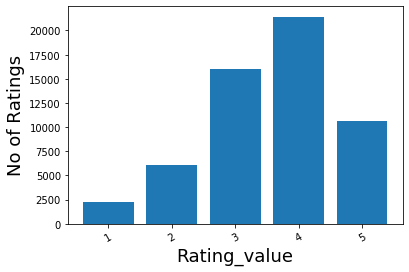

In [11]:
import matplotlib.pyplot as plt
import numpy as np
label = [1,2,3,4,5]
no_ratings = [cnt_1,cnt_2,cnt_3,cnt_4,cnt_5]
index = np.arange(len(label))
plt.bar(index, no_ratings)
plt.xlabel('Rating_value', fontsize=18)
plt.ylabel('No of Ratings', fontsize=18)
plt.xticks(index, label, fontsize=10, rotation=30)
# plt.title('Market Share for Each Genre 1995-2017')
plt.show()

In [70]:
len(train_df.movieId.unique())

8954

In [71]:
n_users, n_movies = len(train_df.userId.unique()), len(train_df.movieId.unique())
f'The dataset includes {len(train_df)} ratings by {n_users} unique users for {n_movies} unique movies'

'The dataset includes 80669 ratings by 610 unique users for 8954 unique movies'

# Approach 1: Matrix Factorization with Neural Networks

In [72]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Flatten, Dense, Dropout, concatenate, multiply, Input
from keras.optimizers import Adam

In [73]:
from sklearn.datasets import load_iris
from sklearn import preprocessing

In [74]:
dim_embedding_user = 40
dim_embedding_movie = 40
#book embedding
movie_input = Input(shape=[1],name = 'Movie')
# movie_input = preprocessing.scale(movie_input)
movie_embedding = Embedding(n_movies+1,dim_embedding_movie,name='Movie-Embedding')(movie_input)
movie_vec = Flatten(name='movie_flatten')(movie_embedding)
movie_vec = Dropout(0.2)(movie_vec)
#user embedding
user_input = Input(shape=[1],name='User')
# user_input = preprocessing.scale(user_input)
user_embedding = Embedding(n_users+1,dim_embedding_user,name = 'User-Embedding')(user_input)
user_vec = Flatten(name='user_flatten')(user_embedding)
user_vec = Dropout(0.2)(user_vec)
#concatenate flattened values
concat = concatenate([movie_vec,user_vec])
concat_dropout = Dropout(0.2)(concat)
#dense layer
dense = Dense(20,name='Fully-Connected1',activation='relu')(concat)
result = Dense(1,activation='relu',name='Activation')(dense)
#define model
model = Model([user_input,movie_input],result)
#show model summary
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Movie (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 40)        358200      Movie[0][0]                      
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 40)        24440       User[0][0]                       
__________________________________________________________________________________________________
movie_flat

In [21]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
x_user = preprocessing.scale(train_df['userId'])

In [31]:
train_df['rating'].size

80669

In [122]:
opt_adam = Adam(lr = 2e-3)

## compile model
model.compile(optimizer= opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

## fit model
history_tabular = model.fit([train_df['userId'],train_df['movieId']],
                                    train_df['rating'],
                                    batch_size = 256,
                                    validation_split = 0.1,
                                    epochs = 10,
                                    verbose = 1)

Train on 72602 samples, validate on 8067 samples
Epoch 1/10
72602/72602 [==============================] - 2s 30us/step - loss: 0.3875 - mean_absolute_error: 0.4668 - val_loss: 0.2687 - val_mean_absolute_error: 0.3747
Epoch 2/10
72602/72602 [==============================] - 2s 22us/step - loss: 0.3842 - mean_absolute_error: 0.4645 - val_loss: 0.2965 - val_mean_absolute_error: 0.3959
Epoch 3/10
72602/72602 [==============================] - 2s 22us/step - loss: 0.3789 - mean_absolute_error: 0.4601 - val_loss: 0.3116 - val_mean_absolute_error: 0.4077
Epoch 4/10
72602/72602 [==============================] - 2s 22us/step - loss: 0.3782 - mean_absolute_error: 0.4601 - val_loss: 0.3254 - val_mean_absolute_error: 0.4151
Epoch 5/10
72602/72602 [==============================] - 2s 22us/step - loss: 0.3740 - mean_absolute_error: 0.4573 - val_loss: 0.3410 - val_mean_absolute_error: 0.4275
Epoch 6/10
72602/72602 [==============================] - 2s 23us/step - loss: 0.3736 - mean_absolute_erro

In [123]:
pd.DataFrame(history_tabular.history)

,val_loss,val_mean_absolute_error,loss,mean_absolute_error
0,0.268682,0.374658,0.387476,0.466824
1,0.296461,0.395881,0.384183,0.464511
2,0.311647,0.407724,0.378887,0.460088
3,0.325356,0.415068,0.378209,0.460058
4,0.341035,0.427465,0.373979,0.457341
5,0.350021,0.433577,0.373591,0.457416
6,0.357753,0.437839,0.368542,0.454164
7,0.376579,0.452680,0.367007,0.454122
8,0.374862,0.448217,0.366310,0.453346
9,0.386907,0.462785,0.362146,0.450320


In [124]:
test_df = pd.read_csv("test12.csv")

In [125]:
test_df.head()

,userId,movieId,rating
0,1,0,5.0
1,1,1,5.0
2,1,2,4.0
3,1,3,4.0
4,1,4,4.0


In [126]:
model.evaluate(x=[test_df['userId'],test_df['movieId']],y=test_df['rating'],verbose=0)

[1.453503784080239, 0.9383149159033238]

# Approach 2: Tabular Data Method

In [99]:
dim_embedding_user = 50
dim_embedding_movie = 50
#movie embedding
movie_input = Input(shape=[1],name='Movie')
movie_embedding = Embedding(n_movies+1,dim_embedding_movie,name='Movie-Embedding')(movie_input)
movie_vec = Flatten(name='Movie-Flatten')(movie_embedding)
movie_vec = Dropout(0.2)(movie_vec)
#user embedding
user_input = Input(shape=[1],name = 'User')
user_embedding = Embedding(n_users+1,dim_embedding_user,name='User-Embedding')(user_input)
user_vec = Flatten(name='User-Flatten')(user_embedding)
user_vec = Dropout(0.2)(user_vec)
concat = concatenate([movie_vec,user_vec])
concat_dropout = Dropout(0.2)(concat)
dense_1 = Dense(20,name='Fully-Connected1',activation ='relu')(concat)
result = Dense(1,activation='relu',name='Activation')(dense_1)
model_tabular = Model([user_input,movie_input],result)
model_tabular.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Movie (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 50)        447750      Movie[0][0]                      
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 50)        30550       User[0][0]                       
__________________________________________________________________________________________________
Movie-Flat

In [100]:
opt_adam = Adam(lr = 0.002)

## compile model
model_tabular.compile(optimizer= opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

In [103]:
history_tabular1 = model_tabular.fit([train_df['userId'], train_df['movieId']],
                                    train_df['rating'],
                                    batch_size = 256,
                                    validation_split = 0.005,
                                    epochs = 4,
                                    verbose = 0)

In [104]:
pd.DataFrame(history_tabular1.history)


,val_loss,val_mean_absolute_error,loss,mean_absolute_error
0,0.717681,0.651385,2.406234,1.119693
1,0.700666,0.643241,0.779976,0.682810
2,0.708969,0.653567,0.744410,0.666002
3,0.755514,0.678257,0.723287,0.653403


In [130]:
model_tabular.evaluate(x=[test_df['userId'],test_df['movieId']],y=test_df['rating'],verbose=0)

[1.150821368417784, 0.8474697268859794]

# Collaborative Filtering with FastAI

In [141]:
# %%script false 

## import fast.ai modules
from fastai.collab import *
from fastai.tabular import *

## define user/item column names in the training data
user, item = 'userId','movieId'
data = CollabDataBunch.from_df(train_df, seed=42 )
y_range = [0, 5.5]
learn = collab_learner(data, n_factors = 10, y_range = y_range,metrics=mean_absolute_error)

# Finding Appropriate Learning Rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


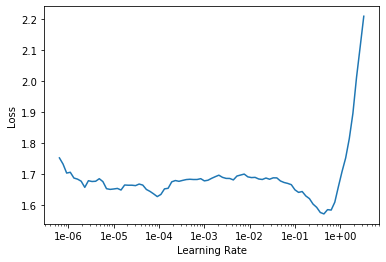

In [142]:
learn.lr_find()
learn.recorder.plot()

In [143]:
learn.fit_one_cycle(3, 0.01)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,0.795105,0.792166,0.687611,00:04
1,0.685934,0.738682,0.660417,00:04
2,0.507527,0.742883,0.662965,00:03


In [144]:
data_test = CollabDataBunch.from_df(test_df, seed=42)
learn.validate(data_test.valid_dl)

[1.1447802, tensor(0.8430)]

# Collaborative Filtering with Neural Network (FastAI)

In [159]:
# %%script false 

## import fast.ai modules
from fastai.collab import *
from fastai.tabular import *

## define user/item column names in the training data
user, item = 'userId','movieId'
data = CollabDataBunch.from_df(train_df, seed=42, test=test_df)
y_range = [0, 5.5]
emb_szs_param= {}
emb_szs_param['movieId']=50
emb_szs_param['userId']=50
learn = collab_learner(data, use_nn=True, n_factors = 10,emb_szs=emb_szs_param, layers=[256,128,64],y_range = y_range)

In [160]:
learn.fit_one_cycle(3, 0.01)

epoch,train_loss,valid_loss,time
0,0.850351,0.810603,00:08
1,0.737608,0.751259,00:06
2,0.658631,0.750230,00:06


In [163]:
preds = learn.get_preds(ds_type = DatasetType.Test)

In [178]:
s=0
i=0
for x in test_df.iterrows():
    temp = abs(x[1]['rating']-preds[0][i])
    s += temp
    i=i+1
s=s/i
print(s)

tensor([0.8241])
